# Naive Bayes
## This notebook outlines the usage and some examples of Naive Bayes Classification Machine learning algorithm

- Naive Bayes models are a group of extremely **fast** and **simple** classification algorithms that are often suitable for very high-dimensional datasets
- **Quick-and-dirty baseline** for a classification problem

## Bayes Theorem

An equation describing the relationship of conditional probabilities of statistical quantities.

Finding the probability of a label given some observed features  $P(L~|~{\rm features})$

Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a **generative model** because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

### Why the name naive?
If we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

# Example 1
# Tennis_dataset :
https://raw.githubusercontent.com/subashgandyer/datasets/main/PlayTennis.csv

In [52]:
import pandas as pd
import numpy as np

In [14]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/PlayTennis.csv"

In [16]:
play_tennis = pd.read_csv(url)
play_tennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### How many features?

In [23]:
len(play_tennis.columns) - 1

4

In [28]:
play_tennis.shape[1]

5

### How many categorical features?

In [24]:
play_tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


### How many numerical features?

In [25]:
play_tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


### How many samples?

In [26]:
play_tennis.shape[0]

14

# Bayes Theorem Exercise: Manual

### Question: If Temperature is Mild, Can Tennis be played?
$$
P(Play Tennis ~|~ {\rm Temperature = Mild})
$$

Hint: Use Bayes' Rule

- 
$$
P(Play Tennis ~|~ {\rm Temperature = Mild}) = \frac{P({\rm Temperature = Mild}~|~ Play Tennis)P(Play Tennis)}{P({\rm Temperature = Mild})}
$$

### Collect only Temperature and Play Tennis features

In [29]:
df = play_tennis[['Temperature', 'Play Tennis']]
df

,Temperature,Play Tennis
0,Hot,No
1,Hot,No
2,Hot,Yes
3,Mild,Yes
4,Cool,Yes
5,Cool,No
6,Cool,Yes
7,Mild,No
8,Cool,Yes
9,Mild,Yes


### Create a Probability Table (manual)

$$
P(Play Tennis ~|~ {\rm Temperature = Mild}) = \frac{P({\rm Temperature = Mild}~|~ Play Tennis)P(Play Tennis)}{P({\rm Temperature = Mild})}
$$

![(Play Tennis Template)](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/PlayTennis_template.png)

### Compute $P({\rm Temperature = Mild})$

### Compute $P({\rm Play Tennis})$

### Compute $P( Temperature = Mild~|~ Play Tennis)$

### Compute $P(Play Tennis ~|~ {\rm Temperature = Mild})$

### Convert the Categorical features into Numerical Features
- Use LabelEncoder( )
- Use OneHotEncoder( )

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
number = LabelEncoder()
play_tennis['Outlook'] = number.fit_transform(play_tennis['Outlook'])
play_tennis['Temperature'] = number.fit_transform(play_tennis['Temperature'])
play_tennis['Humidity'] = number.fit_transform(play_tennis['Humidity'])
play_tennis['Wind'] = number.fit_transform(play_tennis['Wind'])
play_tennis['Play Tennis'] = number.fit_transform(play_tennis['Play Tennis'])

### Split the dataset into X and y

In [32]:
features = ["Outlook", "Temperature", "Humidity", "Wind"]
target = "Play Tennis"

### Split into train and test

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(play_tennis[features], 
                                                                            play_tennis[target],
                                                                            test_size = 0.33,
                                                                            random_state = 54
)


In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9, 4), (5, 4), (9,), (5,))

### Import the GaussianNB Estimator

In [38]:
from sklearn.naive_bayes import GaussianNB

### Create the GaussianNB model

In [39]:
model = GaussianNB()

### Fit the model

In [40]:
model.fit(x_train, y_train)

GaussianNB()

### Predict the testing data

In [41]:
y_pred = model.predict(x_test)

### Accuracy

In [42]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

### Let's apply to a real world sample

- Outlook = Rain
- Temperature = Mild
- Humidity = High
- Wind = Weak

### Build the testing sample vector

In [53]:
sample = np.array([1, 2, 0, 1])

### Predict on the sample

In [57]:
model.predict(sample.reshape(1,-1))

array([1])

### Try some other sample with different values

- Outlook = Rain
- Temperature = Cold
- Humidity = High
- Wind = Weak

# Example 2
# Text Classification

This task is to classify the text with respect to newsgroup classes.

Given a piece of text, find which class (topic) it belongs to.

### Newsgroup Built-in dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Fetch the training set and testing test

In [2]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

### Explore the training data

In [3]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

### How to convert this piece of text into numerical vectors?
Solution: NLP Feature Extraction

### Let's do a simple TF-IDF Vectorizer
Do not worry too much about it as we will see it in a subsequent lecture in detail on Feature Extraction techniques.

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.


### Import TfidfVectorizer

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Import Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

### Import pipeline

In [ ]:
from sklearn.pipeline import make_pipeline

### Create a pipeline with Tfidf and MultinomialNB

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

### Fit the model

In [5]:
model.fit(train.data, train.target)

### Predict on testing data

In [ ]:
labels = model.predict(test.data)

### Confusion matrix between the true and predicted labels for the test data

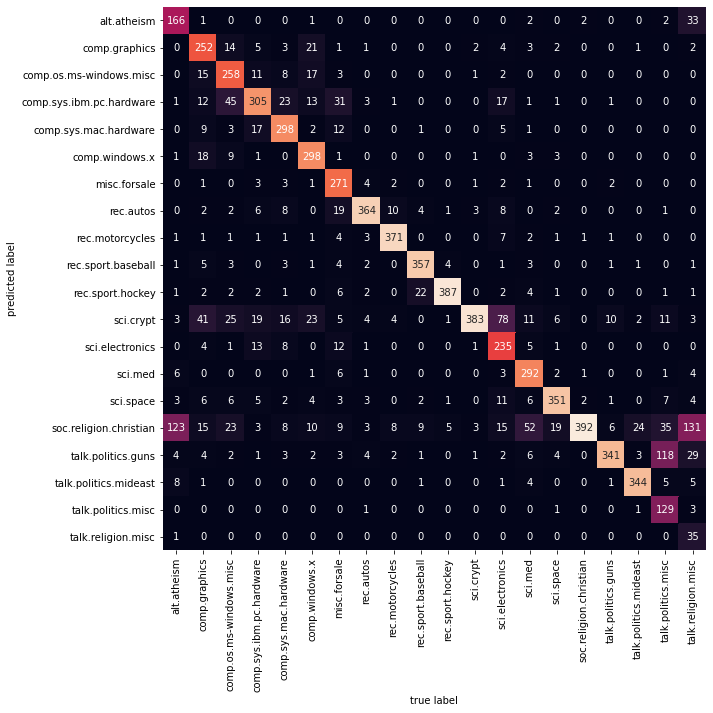

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Insights ???

### Predict function

In [9]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

### Test some samples

In [10]:
predict_category('sending a payload to the ISS')

'sci.space'

In [11]:
predict_category('discussing islam vs atheism')

'alt.atheism'

In [12]:
predict_category('determining the screen resolution')

'comp.graphics'